In [10]:
%matplotlib inline

from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [11]:
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 3)


Unnamed: 0         V1         V2
0           1   2.072345  -3.241693
1           2  17.936710  15.784810
2           3   1.083576   7.319176
3           4  11.120670  14.406780
4           5  23.711550   2.557729

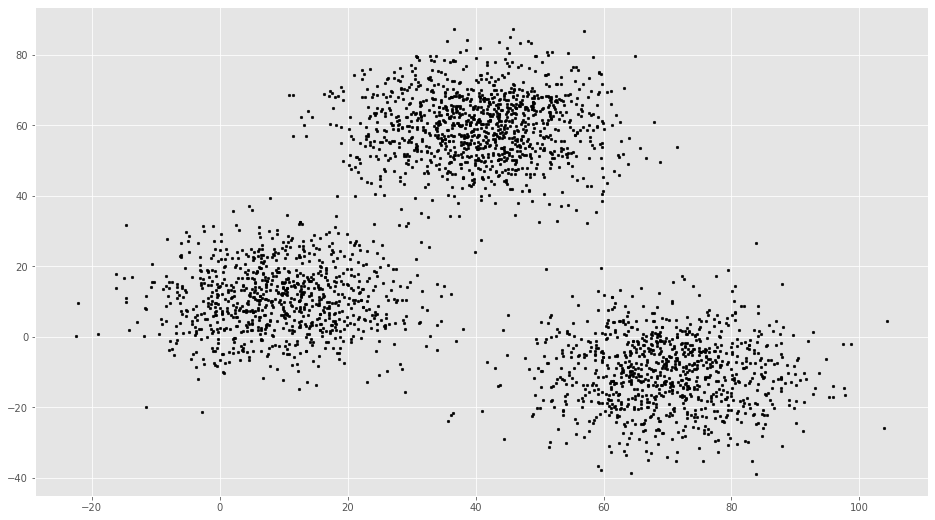

In [12]:
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1,f2)))
plt.scatter(f1, f2, c='black', s=7)

In [13]:
def dist(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [14]:
# Number of clusters
k = 3

C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[23. 15.]
 [14. 16.]
 [ 7. 67.]]


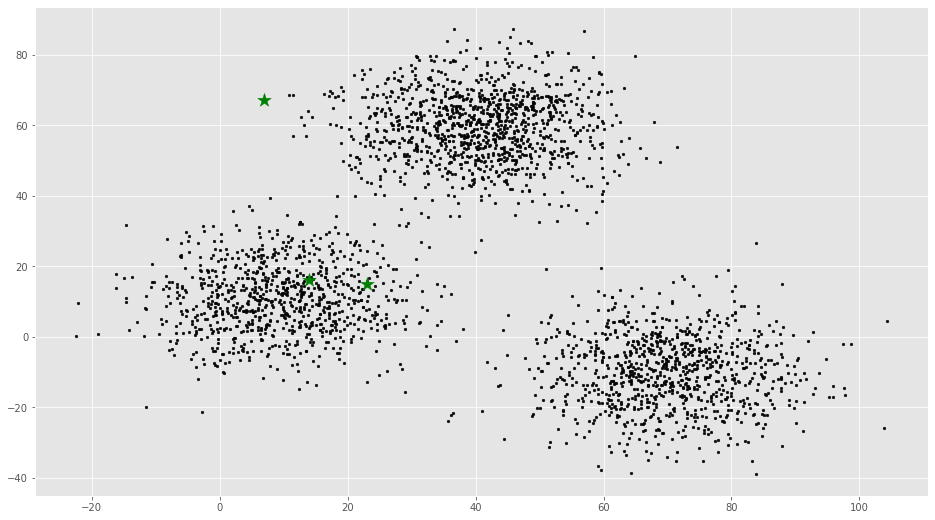

In [15]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

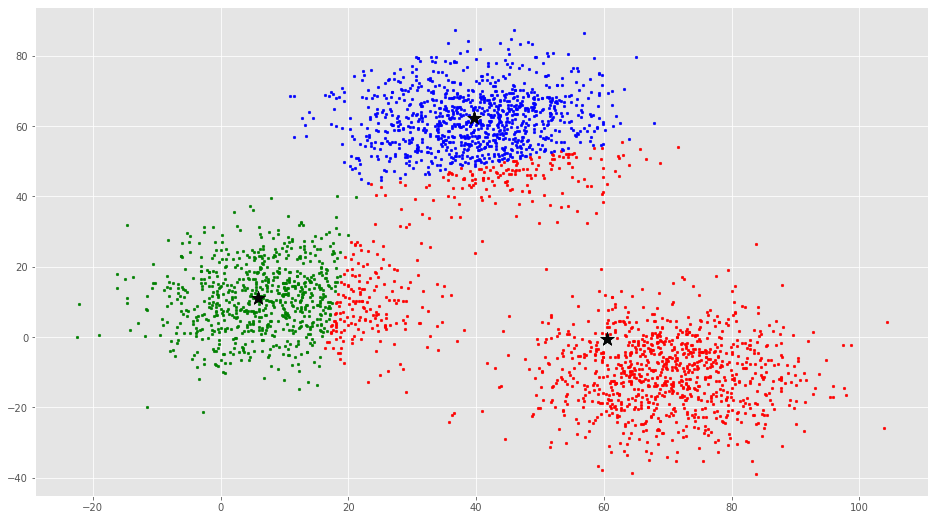

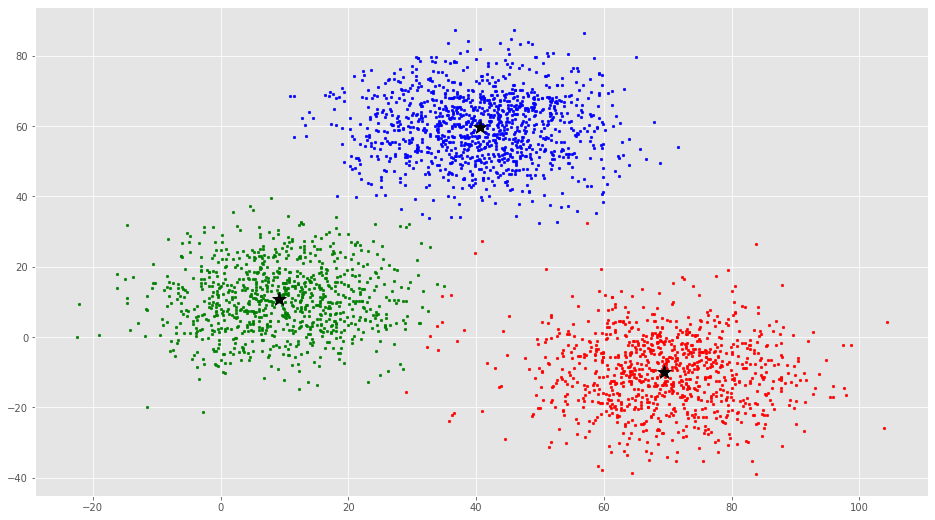

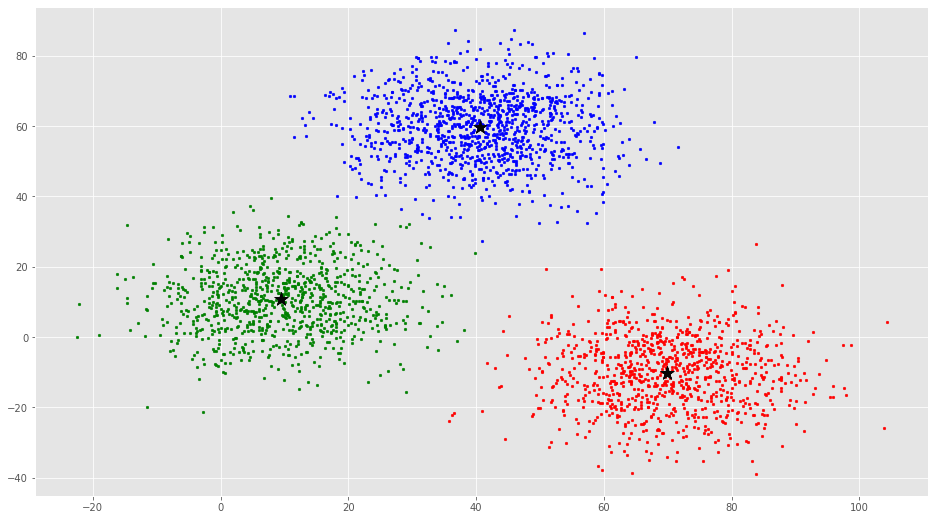

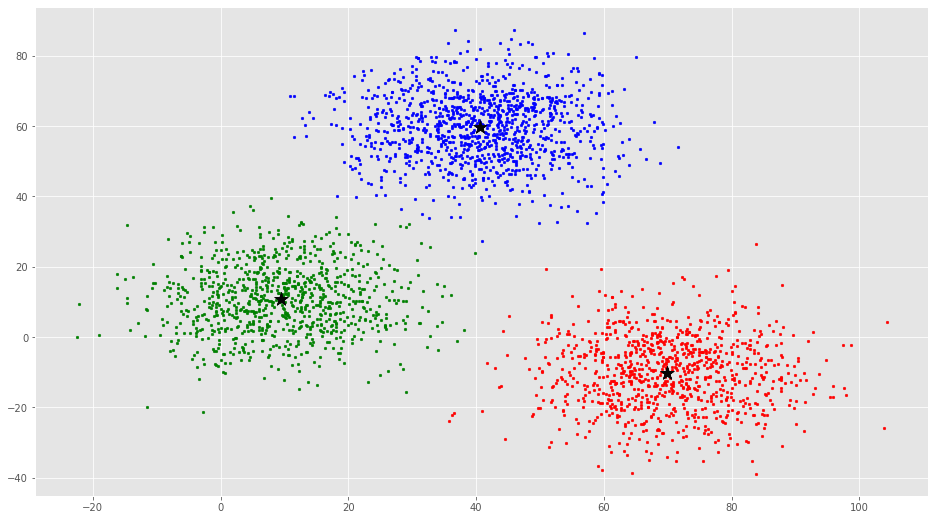

In [16]:
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))

error = dist(C, C_old, None)

while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(C)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()

    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:,0], points[:,1], s=7, c=colors[i])
        ax.scatter(C[:,0], C[:,1], marker='*', s=200, c='#050505')